In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
x.shape

(150, 4)

In [6]:
y.shape

(150,)

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Visualize the data

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

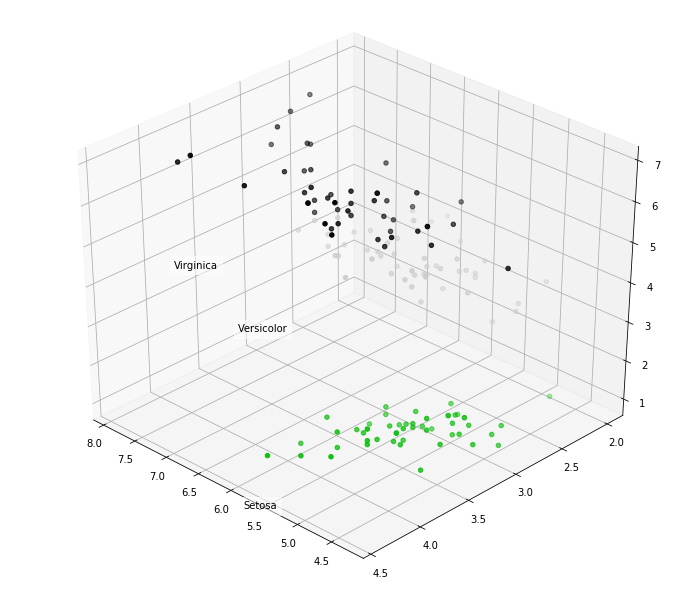

In [17]:
fig = plt.figure(1, figsize=(10,8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=34, azim=134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
    ax.text3D(x[y == label, 0].mean(),
             x[y == label, 1].mean() + 1.5,
             x[y == label, 2].mean(), name,
             horizontalalignment='center',
             bbox=dict(alpha=.5, edgecolor ='w', facecolor ='w'))
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y_clr, cmap = cm.get_cmap('nipy_spectral'))
plt.show()

Building a classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify = y, random_state=42)

In [56]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [57]:
model.score(x_test, y_test)

0.8888888888888888

Using PCA

In [59]:
from sklearn.decomposition import PCA

In [61]:
X_centered = x - x.mean(axis=0)

In [62]:
pca = PCA(n_components=2)

In [65]:
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_pca = pca.transform(X_centered)

In [67]:
X_pca.shape

(150, 2)

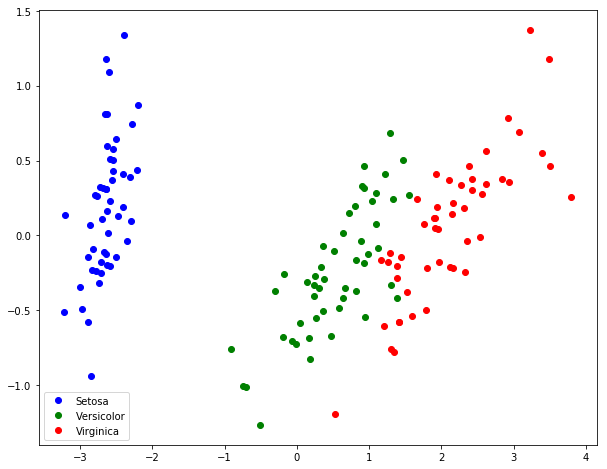

In [69]:
fig = plt.figure(1, figsize=(10,8))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolor')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.show()

In [71]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [74]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Building classifier using PCA

In [75]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(pca.transform(x_train), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [77]:
model.score(pca.transform(x_test), y_test)

0.9111111111111111

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline